# Introducción al aprendizaje automático con scikit-learn

El aprendizaje automático es un tipo de inteligencia artificial (AI) que proporciona a las computadoras la capacidad de aprender, sin ser programadas explícitamente. El aprendizaje automático se centra en el desarrollo de programas informáticos que pueden cambiar cuando se exponen a nuevos datos.

<img src="..\images\AI.png" style="width: 450px;"/>

El aprendizaje automático utiliza esos datos para detectar patrones en los datos y ajustar las acciones del programa en consecuencia. Los algoritmos del aprendizaje automático se clasifican a menudo como supervisados o no supervisados.

En este cuaderno se utilizará el paquete `scikit-learn` de Python para crear modelos predictivos a partir de datos de una manera rápida y sencilla.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

## Regresión lineal
El objetivo es ajustar una recta a un conjunto de datos. Esto difícilmente se puede llamar _machine learning_, pero ayudará a comprender la forma de trabajar con `scikit-learn`, cómo se entrenan los modelos y cómo se calculan las predicciones.

En primer lugar se crean datos sintéticos con distribución normal

In [ ]:
x = np.random.randn(50)
y = 2.0 * x + 0.8 * np.random.randn(50)

plt.scatter(x, y);

El proceso para usar `scikit-learn` es el siguiente:

1. Separar los datos en matriz de características `features` y variable a predictora `y`
2. Seleccionar el modelo
3. Elegir los hiperparámetros
4. Ajustar o entrenar el modelo (`model.fit`)
5. Predecir con datos nuevos (`model.predict`)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)

<div class="alert alert-info">Hacer `reshape` para transformar el arreglo x en un vector columna, X. </div>

In [ ]:
X = x.reshape(-1, 1)

In [ ]:
#Realizar el ajuste del modelo con los datos X, y
model.fit(X, y)

In [ ]:
#Realizar predicciones
y_hat = model.predict(X)

Para realizar las pruebas de desempeño se utilza el módulo `sklearn.metrics` el cual tiene varias funciones útiles:

In [2]:
from sklearn import metrics

In [ ]:
abs_error = metrics.mean_absolute_error(y, y_hat)
abs_error

Y ahora predecimos con datos nuevos:

In [ ]:
x_new = np.linspace(x.min(), x.max(), 10)

In [ ]:
y_pred = model.predict(x_new.reshape(-1, 1))

In [ ]:
plt.scatter(x, y)

plt.plot(x_new, y_pred, 'k--')
plt.scatter(x_new, y_pred, marker='x', lw=3, zorder=10)

plt.fill_between(x_new, y_pred + abs_error, y_pred - abs_error, color="C0", alpha=0.3);

## Introducción rápida al aprendizaje automático

En aprendizaje automático hay dos tipos de problemas:

* **Aprendizaje supervisado**, cuando existen datos _etiquetados_, es decir: se conoce la variable a predecir de un cierto número de observaciones. Pasando esta información al algoritmo, este será capaz de predecir dicha variable cuando reciba observaciones nuevas. Dependiendo de la naturaleza de la variable a predecir, se tiene a su vez:
  - **Regresión**, si es continua (como el caso anterior), o
  - **Clasificación**, si es discreta o categórica (sí/no, color de ojos, etc)
* **Aprendizaje no supervisado**, cuando no hay datos _etiquetados_ y por tanto no se dispone de información _a priori_. En este caso se emplean los algoritmos para descubrir patrones en los datos y agruparlos.

En función de la naturaleza del problema, `scikit-learn` proporciona una gran variedad de algoritmos que se pueden elegir.

![Machine Learning map](../images/ml_map.png)

[scikit-learn](https://scikit-learn.org/stable/)

## Clasificación

En `scikit-learn` proporciona datasets clásicos que se pueden utilizar para practicar. Uno de ellos es el dataset MNIST, que consiste en imágenes escaneadas de números escritos a mano por funcionarios de los EEUU. Para cargarlo, se importa la función correspondiente de `sklearn.datasets`:

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Se tienen los datos separados en matriz de características y vector de predicción. En este caso, son 64 = 8x8 características (un valor numérico por cada pixel de la imagen) y la variable a predecir será el número en sí.

### Creación de dataset de entrenamiento y prueba

En aprendizaje supervisado, se recomomienda dividir el dataset original en una parte para entrenamiento y otra para test.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# X_train, X_test, Y_train, Y_test =
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.75)

In [7]:
# Dimesiones del conjunto de entrenamiento
X_train.shape, y_train.shape

((1347, 64), (1347,))

In [8]:
# Dimesiones del conjunto de prueba
X_test.shape, y_test.shape

((450, 64), (450,))

Para visualizar las imágenes se tiene que hacer un `.reshape` para representar la imagen de 8X8:

In [9]:
num_ = X_test[42] # un vector
label_ = y_test[42] #la etiqueta de número
print(num_)
print(label_)

[ 0.  0.  7. 12.  9.  0.  0.  0.  0.  0. 12. 16. 16.  1.  0.  0.  0.  0.
 11. 16. 16.  0.  0.  0.  0.  0. 12. 16. 16.  0.  0.  0.  0.  0. 13. 16.
 16.  0.  0.  0.  0.  0. 13. 16. 16.  0.  0.  0.  0.  1. 14. 16. 16.  1.
  0.  0.  0.  0.  4. 12. 12.  9.  0.  0.]
1


In [10]:
#recrear imagen de 8X8
num_.reshape(8, 8).astype(int) 

array([[ 0,  0,  7, 12,  9,  0,  0,  0],
       [ 0,  0, 12, 16, 16,  1,  0,  0],
       [ 0,  0, 11, 16, 16,  0,  0,  0],
       [ 0,  0, 12, 16, 16,  0,  0,  0],
       [ 0,  0, 13, 16, 16,  0,  0,  0],
       [ 0,  0, 13, 16, 16,  0,  0,  0],
       [ 0,  1, 14, 16, 16,  1,  0,  0],
       [ 0,  0,  4, 12, 12,  9,  0,  0]])

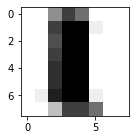

In [11]:
#Mostrar imagen
plt.figure(figsize=(2, 2))
plt.imshow(num_.reshape(8, 8), cmap=plt.cm.gray_r)

In [12]:
label_

1

<div class="alert alert-block alert-warning">
Un humano puede saber qué número es cada imagen. La computadora lo sabe porque están etiquetadas, pero ¿qué pasa si viene una imagen nueva? Para eso se tiene que construir un modelo de clasificación. En este caso se aplicará la <b>regresión logística</b>
</div>

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Crear una instancia, i.e. un objeto de la clase LogisticRegression
logmodel = LogisticRegression(solver='lbfgs')

In [15]:
# Ajustar el modelo usando los datos de entrenamiento
logmodel.fit(X_train, y_train)

C:\Users\pvelarde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pvelarde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pvelarde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pvelarde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\pvelarde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase th

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Y una vez ajustado el modelo, comprobar cuáles son sus predicciones usando los mismos datos de entrenamiento:

In [17]:
# Ver los resultados para los datos de test
y_pred = logmodel.predict(X_test)

De nuevo emplear `sklearn.metrics` para medir la eficacia del algoritmo:

In [18]:
metrics.accuracy_score(y_pred, y_test)

0.9666666666666667

¡Parece que el modelo ha acertado prácticamente todas! Se revisará este porcentaje de éxito, que bien podría ser engañoso. De momento, obtener otra medida de éxito que es la matriz de confusión:

In [19]:
metrics.confusion_matrix(y_pred, y_test)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  1, 38,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 56,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 36,  3],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 45]], dtype=int64)

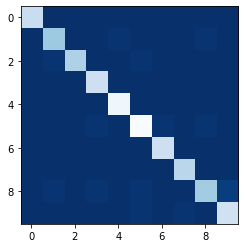

In [20]:
plt.imshow(metrics.confusion_matrix(y_pred, y_test), cmap=plt.cm.Blues_r)